# Transactional Data

In [4]:
import pandas as pd
import datetime as dt
from math import floor, ceil
import matplotlib.pyplot as plt

In [507]:
df_transac_data = pd.read_csv(r'C:\Users\spide\Documents\ProcessoSeletivo\dataEloGroup\transactional_data.csv', sep=';')
df_transac_data.head()

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,"9,0"
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,"13,0"
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,"49,0"
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,"11,0"
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,"10,0"


In [508]:
df_transac_data

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,"9,0"
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,"13,0"
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,"49,0"
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,"11,0"
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,"10,0"
...,...,...,...,...,...,...,...,...
2355236,7664157546-1,M,06/03/1971 00:00:00,2021-02-12,7664157546-1-1,L697,70004038,"10,0"
2355237,7664157546-1,M,06/03/1971 00:00:00,2021-02-12,7664157546-1-1,L697,70004134,"10,0"
2355238,7664157546-1,M,06/03/1971 00:00:00,2021-02-12,7664157546-1-1,L697,70003056,"9,0"
2355239,7664157546-1,M,06/03/1971 00:00:00,2021-02-12,7664157546-1-1,L697,70004185,"13,0"


In [509]:
df_transac_data.head()
print(df_transac_data.index.size)

2355241


In [510]:
df_transac_data = df_transac_data.drop_duplicates().reset_index(drop=True)
print(df_transac_data.index.size)
# Considerando que a data do serviço é uma das colunas, é extremamente improvável que o mesmo paciente
# realize o mesmo exame duas vezes ao dia. Como essa informação não é verificável caso a caso, optei
# por remover todas as duplicatas.

2340722


In [511]:
df_transac_data.apply(lambda x: str(x['Date of birth'])[11:] == '00:00:00', axis=1).value_counts()
# Inspecionando os dados, fica claro que o horário de nescimento é irrelevante

True     2339086
False       1636
dtype: int64

In [512]:
Series = df_transac_data.apply(lambda x: str(x['Date of birth'])[:10], axis=1)
# Série com apenas data (não horário) de nascimento

In [513]:
df_transac_data = df_transac_data.drop(columns=['Date of birth'])
df_transac_data.insert(2, 'DateOfBirth', Series)
# Removida coluna com informações desnecessárias + adicionada coluna nova

In [514]:
for i in range(0, 10000):
    day, month, year = df_transac_data.loc[i, 'DateOfBirth'].split('/')
    if int(day) == 30:
        print('modo normal')
        break
# Verificação de que as datas não estão no padrão americano

modo normal


In [515]:
# função para transformar strings da tabela em date.datetime
def str_to_date(str_date, sep='/', day_first=True):
    if day_first:
        day, month, year  = str_date.split(sep)
    else:
        year, month, day  = str_date.split(sep)
    date = dt.date(int(year), int(month), int(day))
    return date

In [516]:
for i in range(0, 10000):
    day, month, year = df_transac_data.loc[i, 'DateOfBirth'].split('/')
    if int(day) == 30:
        print('modo normal')
        break
# verifica que as datas não estão no modelo norte-americano

modo normal


In [517]:
df_transac_data = df_transac_data.dropna()
# remover missing values não resolveu o problema, porque algumas informações de datas não seguem o padrão
# estabelecido de DD/MM/YYYY

In [518]:
unwanted_index = []
for i in range(0, df_transac_data.index.size):
    try:
        day, month, year = df_transac_data.loc[i, 'DateOfBirth'].split('/')
    except:
        print(i, end=': ')
        unwanted_index.append(i)
        print(df_transac_data.loc[i, 'DateOfBirth'])
# linha onde ocorre o problema encontrada, agora resta descartá-la

1245663: nan


In [519]:
for i in unwanted_index:
    df_transac_data = df_transac_data.drop([i])

df_transac_data.index = range(len(df_transac_data))
# df_transac_data.reset_index(drop=True, inplace=True)
# linha problemática eliminada

In [520]:
Series2 = df_transac_data.apply(lambda x: str_to_date(x['DateOfBirth']), axis=1)
# Série com data de nascimento em datetime.date

In [521]:
df_transac_data = df_transac_data.drop(columns=['DateOfBirth'])
df_transac_data.insert(2, 'Date_Of_Birth', Series2)
# coluna com data de nascimento em datetime.date

In [522]:
for i in range(0, 10000):
    year, month, day = df_transac_data.loc[i, 'Date of service'].split('-')
    if int(day) == 30:
        print('modo normal')
        break
# verifica se a data de serviço está de acordo com a norma

modo normal


In [523]:
Series3 = df_transac_data.apply(lambda x: str_to_date(x['Date of service'], sep='-', day_first=False), axis=1)
# Série com data de serviço atualizada para tipo datetime.date

In [524]:
df_transac_data = df_transac_data.drop(columns=['Date of service'])
df_transac_data.insert(3, 'Date_of_service', Series3)
# coluna atualizada para tipo datetime.date

In [525]:
df_transac_data

,Patient Id,Gender,Date_Of_Birth,Date_of_service,Service Id,Lab Id,CodItem,Testing Cost
0,10210830256-BIO003,F,1976-08-01,2019-01-07,571904533475-38,L133,70003237,"9,0"
1,10210830256-BIO003,F,1976-08-01,2019-01-07,571904533475-38,L133,70000638,"13,0"
2,10210830256-BIO003,F,1976-08-01,2019-01-07,571904533475-38,L133,70001597,"49,0"
3,10210830256-BIO003,F,1976-08-01,2019-01-07,571904533475-38,L133,70000103,"11,0"
4,10210830256-BIO003,F,1976-08-01,2019-01-07,571904533475-38,L133,70000224,"10,0"
...,...,...,...,...,...,...,...,...
2340716,7664157546-1,M,1971-03-06,2021-02-12,7664157546-1-1,L697,70004038,"10,0"
2340717,7664157546-1,M,1971-03-06,2021-02-12,7664157546-1-1,L697,70004134,"10,0"
2340718,7664157546-1,M,1971-03-06,2021-02-12,7664157546-1-1,L697,70003056,"9,0"
2340719,7664157546-1,M,1971-03-06,2021-02-12,7664157546-1-1,L697,70004185,"13,0"


In [526]:
years_diff = lambda t1, t2: floor(abs((t2 - t1).days)/365.25)
Series4 = df_transac_data.apply(lambda x: years_diff(x['Date_of_service'], x['Date_Of_Birth']), axis=1)
# Série com diferença entre data do exame e data de nascimento

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 11 Text major ticklabel objects>)

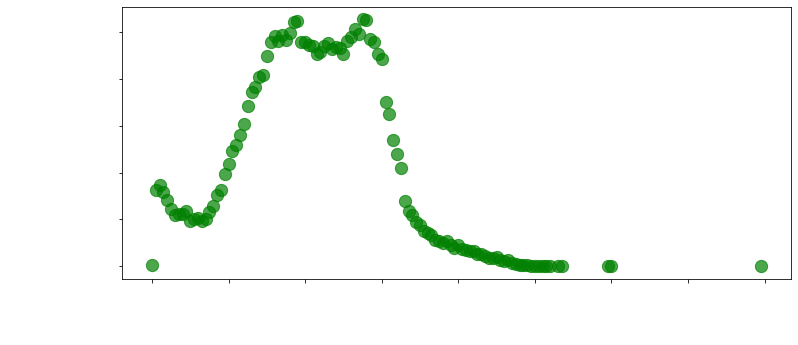

In [527]:
S4 = Series4.value_counts()
plt.figure(figsize=(12,5))
plt.scatter(S4.index, S4.values, c= 'green', s=150, alpha=0.7)
plt.xlabel('Patients\' Age' , size='25', c='w')
plt.ylabel('No Patients', size='25', c='w')
plt.yticks(size='25', c='w')
plt.xticks(size='25', c='w')
# Visualização das idades dos pacientes. Fica claro que algumas idades são incoerentes com a realidade,
# portanto será preciso descartar as linhas que apresentem tais anomalias.

In [528]:
df_transac_data

,Patient Id,Gender,Date_Of_Birth,Date_of_service,Service Id,Lab Id,CodItem,Testing Cost
0,10210830256-BIO003,F,1976-08-01,2019-01-07,571904533475-38,L133,70003237,"9,0"
1,10210830256-BIO003,F,1976-08-01,2019-01-07,571904533475-38,L133,70000638,"13,0"
2,10210830256-BIO003,F,1976-08-01,2019-01-07,571904533475-38,L133,70001597,"49,0"
3,10210830256-BIO003,F,1976-08-01,2019-01-07,571904533475-38,L133,70000103,"11,0"
4,10210830256-BIO003,F,1976-08-01,2019-01-07,571904533475-38,L133,70000224,"10,0"
...,...,...,...,...,...,...,...,...
2340716,7664157546-1,M,1971-03-06,2021-02-12,7664157546-1-1,L697,70004038,"10,0"
2340717,7664157546-1,M,1971-03-06,2021-02-12,7664157546-1-1,L697,70004134,"10,0"
2340718,7664157546-1,M,1971-03-06,2021-02-12,7664157546-1-1,L697,70003056,"9,0"
2340719,7664157546-1,M,1971-03-06,2021-02-12,7664157546-1-1,L697,70004185,"13,0"


In [529]:
impossible_ages_index = []
for i in range(0, df_transac_data.index.size):
    t1 = df_transac_data.loc[i, 'Date_of_service']
    t2 = df_transac_data.loc[i, 'Date_Of_Birth']
    if years_diff(t2, t1) > 114 or years_diff(t2, t1) < 0:
        print(i, end=': ')
        impossible_ages_index.append(i)
        print(df_transac_data.loc[i, 'Date_of_service'], end=' - ')
        print(df_transac_data.loc[i, 'Date_Of_Birth'])
# Encontrando em quais linhas a data do paciente era incondizente com a realidade

84438: 2019-02-22 - 1900-01-01
354063: 2019-04-04 - 1900-01-01
354064: 2019-04-04 - 1900-01-01
354065: 2019-04-04 - 1900-01-01
354066: 2019-04-04 - 1900-01-01
354067: 2019-04-04 - 1900-01-01
354068: 2019-05-04 - 1900-01-01
354069: 2019-05-04 - 1900-01-01
632775: 2019-08-31 - 1900-01-01
824591: 2019-09-19 - 1859-12-28
1659546: 2020-04-05 - 1900-01-01


In [530]:
for i in impossible_ages_index:
    df_transac_data = df_transac_data.drop([i])

df_transac_data.index = range(len(df_transac_data))
# remove as linhas com idades erradas

In [531]:
Series4 = df_transac_data.apply(lambda x: years_diff(x['Date_of_service'], x['Date_Of_Birth']), axis=1)
df_transac_data.insert(4, 'PatientAgeUponTesting', Series4)
# cria nova coluna da idade no momento do teste

In [532]:
Series5 = df_transac_data.apply(lambda x: float(str(x['Testing Cost']).replace(',' , '.')), axis=1)
# Atualizando coluna do preço para float com ponto '.'

In [533]:
df_transac_data = df_transac_data.drop(columns=['Testing Cost'])
df_transac_data.insert(8, 'Testing_Cost', Series5)
# Modificando a coluna de preço para preço para float com ponto '.'

In [544]:
df_transac_data

,Patient Id,Gender,Date_Of_Birth,Date_of_service,PatientAgeUponTesting,Service Id,Lab Id,CodItem,Testing_Cost
0,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70003237,9.0
1,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70000638,13.0
2,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70001597,49.0
3,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70000103,11.0
4,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70000224,10.0
...,...,...,...,...,...,...,...,...,...
2340705,7664157546-1,M,1971-03-06,2021-02-12,49,7664157546-1-1,L697,70004038,10.0
2340706,7664157546-1,M,1971-03-06,2021-02-12,49,7664157546-1-1,L697,70004134,10.0
2340707,7664157546-1,M,1971-03-06,2021-02-12,49,7664157546-1-1,L697,70003056,9.0
2340708,7664157546-1,M,1971-03-06,2021-02-12,49,7664157546-1-1,L697,70004185,13.0


In [567]:
free_CodIdem = [70006809,70006810,70002489,70001660,70006904,70006910,70006899]
# lista de CodItem de exames que possuem "custo operacional zero".  

In [571]:
Series6 = df_transac_data.apply(lambda x: x['CodItem'] in free_CodIdem, axis=1)
# Série com todos os índices do dataframe que tem CodItem de um exame com custo operacional 0 
# Esses exames precisam ser removidos

In [580]:
for index, value in Series6.items():
    if value == True:
        df_transac_data = df_transac_data.drop([index])

df_transac_data.index = range(len(df_transac_data))
# Apaga do banco de dados os exames sem custo operacional fornecido 

In [581]:
df_transac_data

,Patient Id,Gender,Date_Of_Birth,Date_of_service,PatientAgeUponTesting,Service Id,Lab Id,CodItem,Testing_Cost
0,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70003237,9.0
1,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70000638,13.0
2,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70001597,49.0
3,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70000103,11.0
4,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70000224,10.0
...,...,...,...,...,...,...,...,...,...
2339985,7664157546-1,M,1971-03-06,2021-02-12,49,7664157546-1-1,L697,70004038,10.0
2339986,7664157546-1,M,1971-03-06,2021-02-12,49,7664157546-1-1,L697,70004134,10.0
2339987,7664157546-1,M,1971-03-06,2021-02-12,49,7664157546-1-1,L697,70003056,9.0
2339988,7664157546-1,M,1971-03-06,2021-02-12,49,7664157546-1-1,L697,70004185,13.0


In [557]:
free_op = 0
for i in range(0, df_transac_data.index.size):
    t = df_transac_data.loc[i, 'Testing_Cost']
    if t == 0.0 or t == '0.0':
        free_op += 1
        if df_transac_data.loc[i, 'CodItem'] in free_CodIdem:
            continue

# Conta quantos testes foram armazenados como tendo sido realizados sem custo

In [560]:
100*(free_op/df_transac_data.index.size)
# Podemos observar que a porcentagem de exames gratuitos é baixa.
# Faz sentido que alguns exames sejam gratuitos? Há duas hipóteses aqui: os valores não foram fornecidos;
# ou existe alguma política de benefícios na empresa, como pacotes em que um dos exames é feito sem custos
# ou algumas unidades adotam políticas de fidelização. 

1.721704974958378

In [2]:
# Analisando as hipóteses acima, primeiro foram determinados múltiplos CodItem de exames que foram 
# realizados sem custo segundo o database, além de seu custo operacional.
#
# Pelos resultados, podemos observar que vários dos supostamente testes realizados gratuitamente
# apresentam elevado custo operacional para a empresa, o que parece incoerente.
# Para averiguar esta hipótese, é preciso entender o database mais a fundo.

In [590]:
# Aqui, verificamos que pelos CodItem de exames supostamente gratuitos que todas as vezes que estes foram
# realizados, foram gratuitos. 
# Esta descoberta vai contra a hipótese de que a empresa adota políticas de benefícios, uma vez que 
# não faz sentido ter ofertas permanentes. 
cod_item_free = [70005139,70006010,70006532,70007111,70004579,70000621,70004005,70007131,70007218,70002780,70006687,70007606]
for cod in cod_item_free:
    print('\n')
    print(cod, end=': ')
    testing_costs = []
    for index, row in df_transac_data.iterrows():
        if row['CodItem'] == cod and row['Testing_Cost'] not in testing_costs:
            testing_costs.append(row['Testing_Cost'])
            print(row['Testing_Cost'], end=', ')



70005139: 0.0, 

70006010: 0.0, 

70006532: 0.0, 

70007111: 0.0, 

70004579: 0.0, 

70000621: 0.0, 

70004005: 0.0, 

70007131: 0.0, 

70007218: 0.0, 

70002780: 0.0, 

70006687: 0.0, 

70007606: 0.0, 

In [591]:
# Esta descoberta é ratificada no código abaixo, o qual revela que exames com o mesmo CodItem sempre são
# vendidos pelo mesmo valor. Isso está de acordo com a contextualização do problema, onde se afirmava que
# no ramo da medicina diagnóstica é quase impossível realizar ofertas.
cod_item_free = [70000103,70000224,70004038,70003056,70000392]
for cod in cod_item_free:
    print('\n')
    print(cod, end=': ')
    testing_costs = []
    for index, row in df_transac_data.iterrows():
        if row['CodItem'] == cod and row['Testing_Cost'] not in testing_costs:
            testing_costs.append(row['Testing_Cost'])
            print(row['Testing_Cost'], end=', ')



70000103: 11.0, 

70000224: 10.0, 

70004038: 10.0, 

70003056: 9.0, 

70000392: 8.0, 

In [597]:
# As descobertas acima levam a crer que a empresa possui uma tabela a qual não temos acesso, com um valor
# de consumo associado a cada exame. Isso justifica o fato de que os exames com mesmo CodItem sempre são
# vendidos pelo mesmo preço e, principalmente, explica os exames "gratuitos", cujo valor foi,
# provavelmente, erroneamente inserido nesta tabela de valor de consumo.
#
# É necessário, portanto, remover da tabela de transações aquelas que contém informação equivocada acerca
# do preço cobrado pelos exames.
i = 0
for index, row in df_transac_data.iterrows():
    t = row['Testing_Cost']
    if t == 0.0 or t == '0.0':
        df_transac_data = df_transac_data.drop([index])
        i += 1
        print("{}\r".format(i), end="")

df_transac_data.index = range(len(df_transac_data))

In [599]:
df_transac_data.to_csv('df_transac_data_PARTIAL.csv', index=False)
# salva novo arquivo

In [5]:
df_transac_data = pd.read_csv(r'C:\Users\spide\Documents\ProcessoSeletivo\dataEloGroup\df_transac_data_PARTIAL.csv', sep=',')

In [608]:
df_transac_data.head()

,Patient Id,Gender,Date_Of_Birth,Date_of_service,PatientAgeUponTesting,Service Id,Lab Id,CodItem,Testing_Cost
0,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70003237,9.0
1,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70000638,13.0
2,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70001597,49.0
3,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70000103,11.0
4,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70000224,10.0


Observe que apenas df_transac_data_PARTIAL foi salvo aqui. A finalização deste arquivo é feita no segundo Notebook.

# Test Data

In [503]:
df_test_data = pd.read_csv(r'C:\Users\spide\Documents\ProcessoSeletivo\dataEloGroup\test_data.csv', sep=',')
df_test_data.head()

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
0,70003237,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
1,70000638,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,2.46
2,70001597,"FERRITINA, SORO",CA,CORELAB,IMMUNOHORMONE,2.11
3,70000103,"FERRO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE ...",CA,CORELAB,BIOCHEMISTRY,0.80
4,70000224,"CALCIO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE...",CA,CORELAB,BIOCHEMISTRY,1.02


In [541]:
df_test_data[df_test_data['CodItem'] == 70005139]

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
40,70005139,"BACTERIAS, ANTIBIOGRAMA AUTOMATIZADO",CA,MICROBIO,CULTURE,7.87


In [504]:
df_test_data = df_test_data.drop_duplicates('CodItem')
df_test_data.index = range(len(df_test_data))
# Remove testes com mesmo Código de Item

In [505]:
df_test_data.apply(lambda x: float(x['Testing Cost']) == 0.0, axis=1).value_counts()
# Há testes sem custo operacional, o que não faz sentido.

False    1994
True        7
dtype: int64

In [443]:
free_tests_index = []
free_tests_CodItem = []
for i in range(0, df_test_data.index.size):
    t1 = df_test_data.loc[i, 'Testing Cost']
    if t1 <= 0:
        print('\n\n' + str(i), end=':\n')
        free_tests_index.append(i)
        free_tests_CodItem.append(df_test_data.loc[i, 'CodItem'])
        print(df_test_data.iloc[i])
    



187:
CodItem                          70006809
Desc Item       RM MATERIAIS/MEDICAMENTOS
Category                              RID
Family                                MRI
Speciality                      MAT / MED
Testing Cost                            0
Name: 187, dtype: object


343:
CodItem                          70006810
Desc Item       TC MATERIAIS/MEDICAMENTOS
Category                              RID
Family                            CT SCAN
Speciality                      MAT / MED
Testing Cost                            0
Name: 343, dtype: object


818:
CodItem                70002489
Desc Item       VOLUME URINARIO
Category                     CA
Family                  CORELAB
Speciality         BIOCHEMISTRY
Testing Cost                  0
Name: 818, dtype: object


1536:
CodItem                                  70001660
Desc Item       PROLACTINA (BASAL DE PROVA), SORO
Category                                       CA
Family                                    CORELAB


In [495]:
avgs_list = []
avgs = []
for i in range(0, df_test_data.index.size):
    cod = df_test_data.loc[i, 'CodItem']
    if cod in free_tests_CodItem:
        cat = df_test_data.loc[i, 'Category']
        fam = df_test_data.loc[i, 'Family']
        spe = df_test_data.loc[i, 'Speciality']
        k = 1
        tot = 0
        avg_list = []
        for j in range(0, df_test_data.index.size):
            if df_test_data.loc[j, 'Speciality'] == spe and df_test_data.loc[j, 'Category'] == cat and fam == df_test_data.loc[j, 'Family'] and df_test_data.loc[j, 'Testing Cost'] != 0:
                avg_list.append(df_test_data.loc[j, 'Testing Cost'])
                tot += df_test_data.loc[j, 'Testing Cost']
                k += 1
        avg = tot/k
        avgs.append(avg)
        avgs_list.append(avg_list)
                
# Cria avgs_list, que é uma lista de listas que contém os custos de operação de todos exames que têm
# a mesma categoria, família e especialidade.

In [551]:
avgs_list
# inspecionando os custos operacionais de exames com mesma especialidade, categoria e família, observamos
# uma variação grande demais para realizar qualquer previsão de valor. 
# o melhor caminho a seguir é desconsiderar os exames realizados que possuem um CodItem com 'custo zero'

[[],
 [],
 [1.78,
  0.8,
  1.02,
  1.29,
  1.43,
  1.21,
  3.9,
  1.75,
  0.95,
  0.82,
  1.12,
  16.71,
  1.77,
  1.38,
  0.8,
  0.76,
  1.09,
  1.21,
  1.09,
  0.99,
  1.27,
  2.95,
  1.75,
  4.07,
  1.08,
  1.61,
  4.33,
  2.13,
  1.86,
  0.83,
  5.74,
  1.26,
  1.61,
  6.87,
  89.0,
  6.81,
  1.99,
  4.13,
  2.43,
  3.25,
  7.02,
  3.04,
  4.12,
  34.61,
  1.08,
  1.55,
  1.37,
  1.07,
  1.71,
  17.96,
  0.88,
  1.04,
  8.33,
  0.68,
  0.68,
  5.99,
  4.5,
  6.41,
  1.21,
  0.75,
  0.76,
  2.79,
  2.02,
  1.07,
  18.37,
  9.36,
  1.07,
  42.15,
  14.52,
  2.29,
  5.27,
  0.53,
  40.14,
  1.21,
  1.67,
  1.09,
  1.66,
  0.81,
  4.54,
  1.7,
  7.16,
  9.79,
  3.61,
  0.62,
  48.17,
  7.39,
  29.31,
  0.46,
  0.78,
  4.74,
  1.02,
  29.88,
  0.74,
  0.87,
  10.16,
  1.05,
  0.9,
  0.98,
  2.1,
  0.61,
  4.61,
  399.14,
  1.48,
  36.15,
  3.57,
  5.84,
  34.76,
  54.43,
  4.48,
  1.31,
  56.89,
  7.73,
  37.61,
  8.15,
  141.64,
  81.7,
  1.63,
  2.8,
  26.06,
  7.12,
  66.37,
  57.53,

In [552]:
for i in free_tests_index:
    df_test_data = df_test_data.drop([i])

df_test_data.index = range(len(df_test_data))
# remove as linhas com testes de 'custo zero'

In [554]:
df_test_data

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
0,70003237,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
1,70000638,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,2.46
2,70001597,"FERRITINA, SORO",CA,CORELAB,IMMUNOHORMONE,2.11
3,70000103,"FERRO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE ...",CA,CORELAB,BIOCHEMISTRY,0.80
4,70000224,"CALCIO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE...",CA,CORELAB,BIOCHEMISTRY,1.02
...,...,...,...,...,...,...
1989,70008635,"GENES BRCA1 E BRCA2, MLPA, SANGUE",CA,GENETICS,SPECIAL GENETICS,159.91
1990,70005303,"OBSTETRICA 1§ TRIMESTRE (ENDOVAGINAL), SEGUNDO...",RID,ULTRASOUND,FETAL MEDICINE,111.43
1991,70006441,"HEMOFILIA A, ANALISE DO DNA, SEQUENCIAMENTO, S...",CA,GENETICS,SPECIAL GENETICS,27.03
1992,70004141,"INSULINA, SORO, 90 MIN APOS XXX",CA,CORELAB,IMMUNOHORMONE,5.55


In [605]:
df_test_data.to_csv('df_test_data_NEW.csv', index=False)
# salva novo arquivo

In [606]:
df_test_data = pd.read_csv(r'C:\Users\spide\Documents\ProcessoSeletivo\dataEloGroup\df_test_data_NEW.csv', sep=',')
df_test_data.head()

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
0,70003237,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
1,70000638,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,2.46
2,70001597,"FERRITINA, SORO",CA,CORELAB,IMMUNOHORMONE,2.11
3,70000103,"FERRO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE ...",CA,CORELAB,BIOCHEMISTRY,0.80
4,70000224,"CALCIO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE...",CA,CORELAB,BIOCHEMISTRY,1.02


# Economic Data ZCTA

In [130]:
df_econ_data = pd.read_csv(r'C:\Users\spide\Documents\ProcessoSeletivo\dataEloGroup\EconomicData_ZCTAs.csv', sep=',')
df_econ_data.head()

,Unnamed: 0,id,Geographic Area Name,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
0,0,8600000US35004,ZCTA5 35004,198,71,298,513,647,1117,529,945,245,61
1,1,8600000US35005,ZCTA5 35005,188,184,318,293,353,562,299,407,67,26
2,2,8600000US35006,ZCTA5 35006,71,20,117,104,154,176,124,194,51,7
3,3,8600000US35007,ZCTA5 35007,396,208,670,462,1173,1854,1578,2224,473,254
4,4,8600000US35010,ZCTA5 35010,700,610,1093,957,1056,1512,807,749,254,249


In [131]:
df_econ_data = df_econ_data.drop(['Unnamed: 0'], axis=1)
# remove coluna inútil

In [132]:
df_econ_data = df_econ_data.rename(columns={"Geographic Area Name": "GeoAreaName"})
# renomeia coluna com nome que utiliza espaço

In [133]:
a = df_econ_data.drop_duplicates().size
b = df_econ_data.drop_duplicates(subset=['GeoAreaName']).size
c = df_econ_data.drop_duplicates(subset=['id']).size
a == b and b == c
# duplicatas são todas do mesmo tipo, logo basta removê-las com um drop_duplicates() simples

True

In [134]:
df_econ_data = df_econ_data.drop_duplicates()
# remove duplicatas

In [135]:
df_econ_data.apply(lambda x: x['GeoAreaName'][0:5], axis=1).value_counts()
# todos os GeoAreaName iniciam com ZCTA5, portanto essa infrmação é irrelevante
# (até porque não é usada em nenhuma outra tabela)

ZCTA5    33120
dtype: int64

In [136]:
Series = df_econ_data.apply(lambda x: x['GeoAreaName'][6:], axis=1)
df_econ_data.insert(2, 'ZCTA5', Series)
# adiciona esta infomormação de forma mais clara à tabela

In [137]:
mapping = {}
ranges = ['Below10k', '10to15k', '15to25k', '25to35k', '35to50k', '50to75k', '75to100k', '100to150k', '150to200k', 'Over200k']
for i in range (3, 12+1):
    mapping[df_econ_data.columns[i]] = 'TotalHouseholds_' + ranges[i-3]
mapping
df_econ_data = df_econ_data.rename(columns=mapping)
# renomeando colunas de intervalos de renda para strings que não causem problemas

In [138]:
# cria uma série com o total de domicílios por ZCTA
Series2 = df_econ_data.apply(lambda x: x['TotalHouseholds_Below10k'] +x['TotalHouseholds_10to15k'] +x['TotalHouseholds_15to25k'] +x['TotalHouseholds_25to35k'] +x['TotalHouseholds_35to50k'] +x['TotalHouseholds_50to75k'] +x['TotalHouseholds_75to100k'] +x['TotalHouseholds_100to150k'] +x['TotalHouseholds_150to200k']+x['TotalHouseholds_Over200k'], axis=1)

In [139]:
df_econ_data.insert(13, 'TotalHouseholds', Series2)
# insere total de domicílios na tabela

In [160]:
df_econ_data = df_econ_data.drop(df_econ_data[df_econ_data.TotalHouseholds == 0].index, inplace=False)
df_econ_data.reset_index(drop=True)
# remove ZCTAs vazios

,id,GeoAreaName,ZCTA5,TotalHouseholds_Below10k,TotalHouseholds_10to15k,TotalHouseholds_15to25k,TotalHouseholds_25to35k,TotalHouseholds_35to50k,TotalHouseholds_50to75k,TotalHouseholds_75to100k,TotalHouseholds_100to150k,TotalHouseholds_150to200k,TotalHouseholds_Over200k,TotalHouseholds
0,8600000US35004,ZCTA5 35004,35004,198,71,298,513,647,1117,529,945,245,61,4624
1,8600000US35005,ZCTA5 35005,35005,188,184,318,293,353,562,299,407,67,26,2697
2,8600000US35006,ZCTA5 35006,35006,71,20,117,104,154,176,124,194,51,7,1018
3,8600000US35007,ZCTA5 35007,35007,396,208,670,462,1173,1854,1578,2224,473,254,9292
4,8600000US35010,ZCTA5 35010,35010,700,610,1093,957,1056,1512,807,749,254,249,7987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32514,8600000US00979,ZCTA5 00979,00979,735,471,1547,1374,957,1390,662,643,99,319,8197
32515,8600000US00982,ZCTA5 00982,00982,1299,483,1184,848,1104,657,206,79,34,16,5910
32516,8600000US00983,ZCTA5 00983,00983,2638,1368,2495,1845,1906,1952,511,363,110,96,13284
32517,8600000US00985,ZCTA5 00985,00985,2426,1150,2266,1777,1873,1737,501,395,15,26,12166


In [161]:
df_econ_data.to_csv('df_econ_data_NEW.csv', index = False)
# salva novo arquivo

# GeoCode
Este arquivo é sanitizado no segundo Notebook

# Demographic Data
Este arquivo é sanitizado no segundo Notebook